In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quantrautil as q

C:\Users\User\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [3]:
APPLE = q.get_data('AAPL','2018-1-1','2021-2-1' )

[*********************100%***********************]  1 of 1 completed


In [4]:
APPLE.head()

,Open,High,Low,Close,Adj Close,Volume,Source
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.380238,102223600,Yahoo
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.373032,118071600,Yahoo
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.565216,89738400,Yahoo
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.038452,94640000,Yahoo
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.882305,82271200,Yahoo


In [5]:
APPLE.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Source'], dtype='object')

In [6]:
APPLE.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume', 'Source'], axis=1, inplace=True)

In [7]:
APPLE.head()

,Open
Date,
2018-01-02,42.540001
2018-01-03,43.132500
2018-01-04,43.134998
2018-01-05,43.360001
2018-01-08,43.587502


In [8]:
APPLE.describe()

,Open
count,775.000000
mean,66.573077
std,27.548305
min,35.994999
25%,46.587502
50%,54.502499
75%,79.051250
max,143.600006


In [9]:
APPLE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 775 entries, 2018-01-02 to 2021-01-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    775 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB


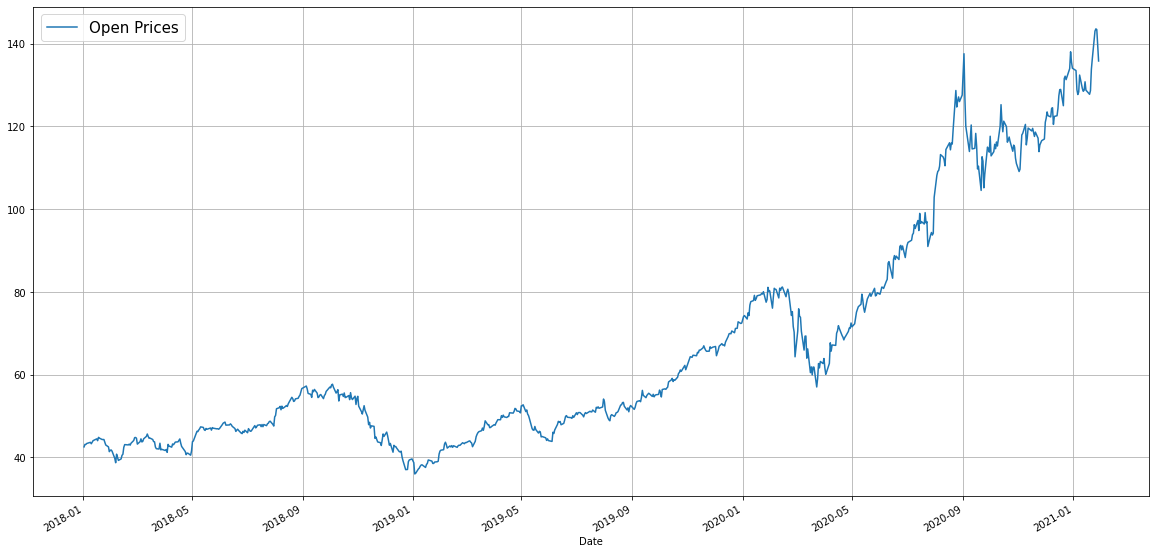

In [10]:
plt.figure(figsize=(20,10))
APPLE.Open.plot(label='Open Prices')
plt.grid(True)
plt.legend(loc=2, fontsize=15)

In [11]:
#CLEAR TREND. But let's do the Aadf test anyway

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [13]:
result = adfuller(APPLE.Open)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.110884
p-value: 0.995308


p-value is way bigger than 5%, we keep H_0 and therefore the data are non-stationary. We need to difference it, as we expected

We need to find the parameters for the ARIMA(p,d,q)

In [14]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
acf(APPLE.Open, fft=False) #default is 40 lags; 1 for the first is set as default; fft=False for simple acf, no through conv.

array([1.        , 0.99339672, 0.9865025 , 0.97953282, 0.97261769,
       0.9657257 , 0.9595732 , 0.95360978, 0.94829429, 0.94306929,
       0.93755075, 0.9319169 , 0.92653019, 0.92122257, 0.91583622,
       0.91010449, 0.90470029, 0.89957418, 0.89410508, 0.88749158,
       0.88076496, 0.87387204, 0.86668364, 0.86012773, 0.85383375,
       0.84746067, 0.84138697, 0.83630177, 0.83045982, 0.82443127,
       0.81873267, 0.81328672, 0.80795134, 0.80264512, 0.7977622 ,
       0.79235753, 0.7868722 , 0.78129318, 0.77572384, 0.77023395,
       0.76465638])

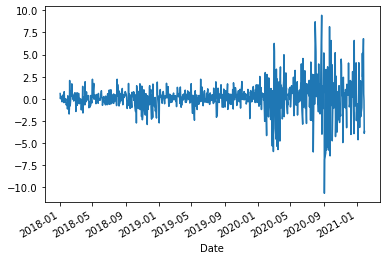

In [21]:
APPLE.Open.diff().dropna().plot()
#seems d=1 will be enough

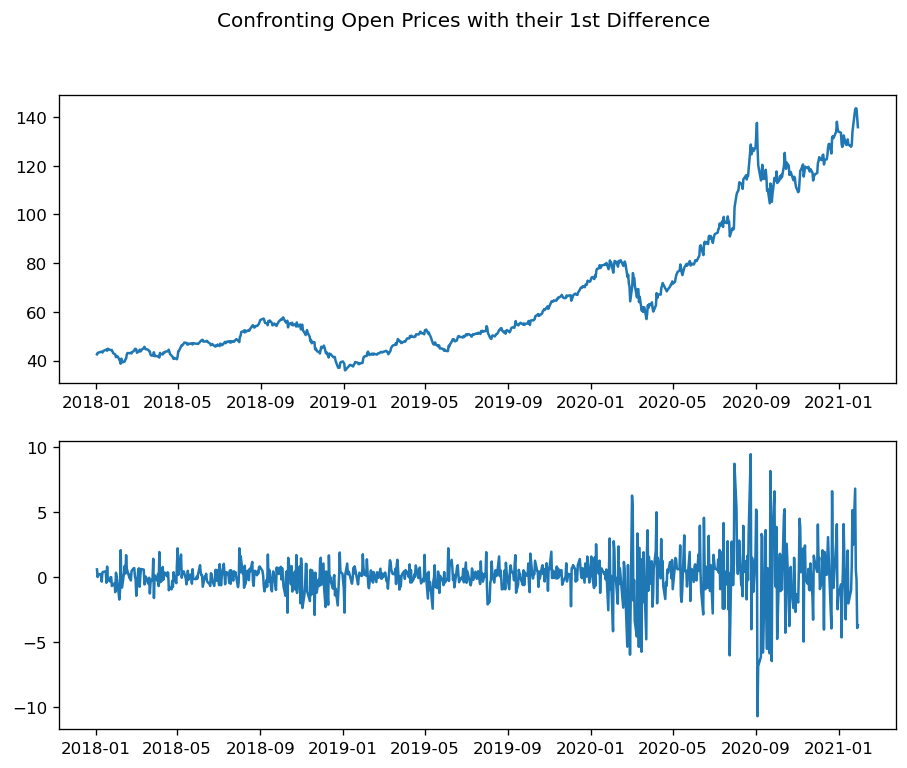

In [53]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Confronting Open Prices with their 1st Difference')
ax1.plot(APPLE.Open)
ax2.plot(APPLE.Open.diff().dropna())

In [28]:
APPLE2 = APPLE.copy()
APPLE2['1st Diff'] = APPLE.Open.diff()
APPLE2.head() #let's drop the first row

,Open,1st Diff
Date,,
2018-01-02,42.540001,NaN
2018-01-03,43.132500,0.592499
2018-01-04,43.134998,0.002499
2018-01-05,43.360001,0.225002
2018-01-08,43.587502,0.227501


In [30]:
APPLE2.dropna(axis=0, how='any', inplace=True)

In [32]:
APPLE2.head()

,Open,1st Diff
Date,,
2018-01-03,43.132500,0.592499
2018-01-04,43.134998,0.002499
2018-01-05,43.360001,0.225002
2018-01-08,43.587502,0.227501
2018-01-09,43.637501,0.049999


In [34]:
pacf(APPLE2['1st Diff'])

array([ 1.        , -0.03463684, -0.10213414, -0.02911374, -0.00535733,
        0.00596915,  0.01804528, -0.00802818,  0.00644801,  0.04387676,
       -0.03642566,  0.00815812, -0.02435503, -0.01120564, -0.0199307 ,
        0.02906911, -0.06324776,  0.04202625,  0.13649025,  0.01518564,
        0.02572334,  0.00802373, -0.0469099 , -0.01826664, -0.04271995,
       -0.04644841, -0.09199113,  0.0416239 ,  0.048693  , -0.02261109,
        0.05010904,  0.05839055,  0.00915453, -0.05298055,  0.01955605,
       -0.00731234,  0.05182936, -0.001918  , -0.0418767 ,  0.06923648,
        0.02356209])

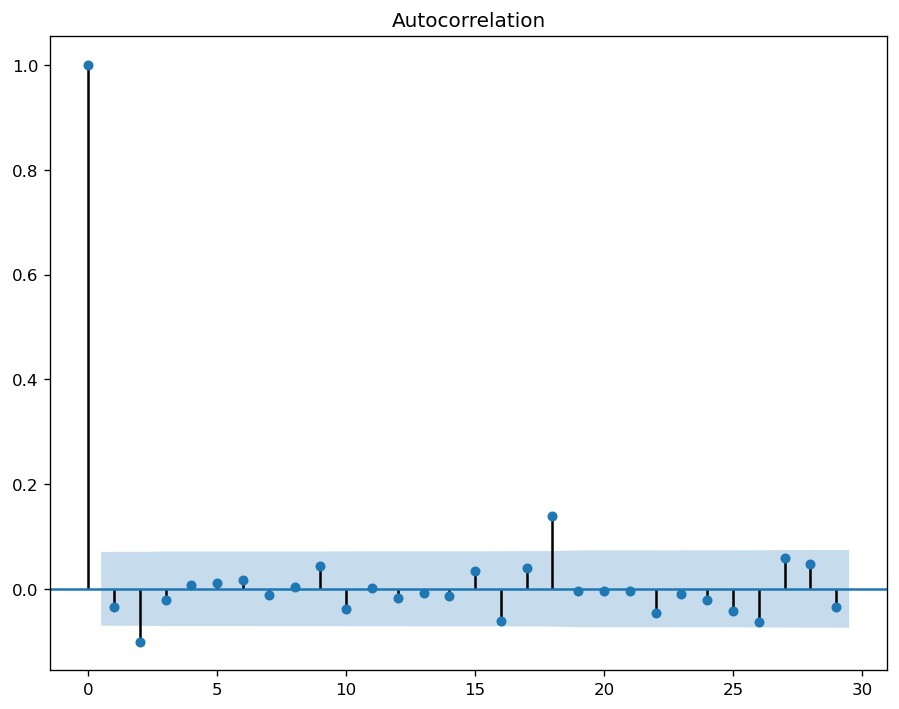

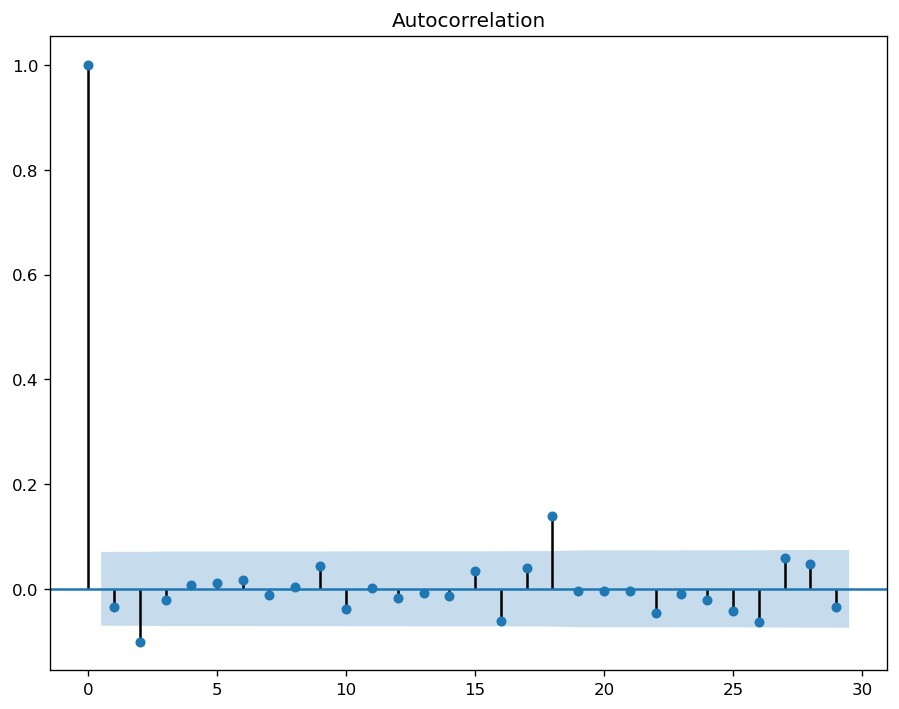

In [42]:
plot_acf(APPLE2['1st Diff'], alpha=0.05) #jupiter plot it twice, it's not a bug. So I put ; in the next one to solve it

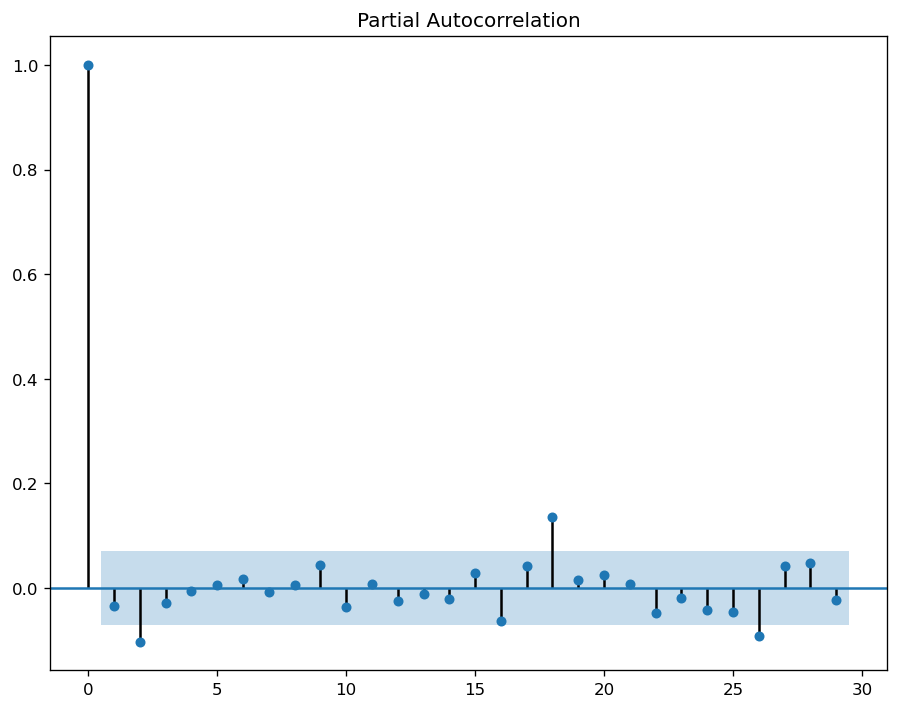

In [48]:

plot_pacf(APPLE2['1st Diff'], alpha=0.05);

So we choose d=1. Now let decide the number of AR variables, therefore the p hyperparameter. Let's have a look to the Open.Price acf and pacf.

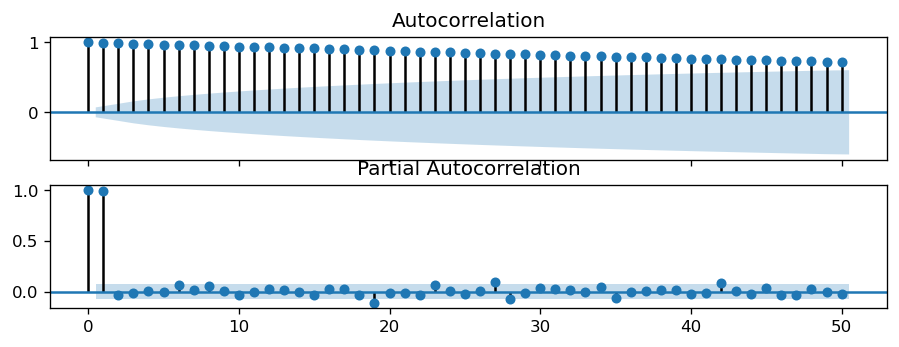

In [73]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=True)

plot_acf(APPLE.Open, lags=50, ax=axes[0])
plot_pacf(APPLE.Open, lags=50, ax=axes[1])

plt.show()

How to read the PARC in this case? Usually we have these 3 scenarios:

1. Large spike at lag 1 that decreases after a few lags: A moving average term in the data. (Solution: use the autocorrelation function to determine the order of the moving average term).

2. Large spike at lag 1 followed by a damped wave that alternates between positive and negative correlations : A higher order moving average term in the data. (Solution: use the autocorrelation function to determine the order of the moving average term).

3. Significant correlations at the first or second lag, followed by correlations that are not significant : An autoregressive term in the data. The number of significant correlations indicate the order of the autoregressive term.

It seems we are in situation 3, since we have just a first two big spikes, and then we are almost inside the confidence level for the following 48 temporal steps. We will then p=2. (and q=0)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                  774
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1527.120
Method:                       css-mle   S.D. of innovations              1.740
Date:                Fri, 05 Mar 2021   AIC                           3062.239
Time:                        14:50:17   BIC                           3080.845
Sample:                             1   HQIC                          3069.398
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1216      0.055      2.219      0.026       0.014       0.229
ar.L1.D.Open    -0.0390      0.036     -1.089      0.276      -0.109       0.031
ar.L2.D.Open    -0.1032      0.036     -2.87

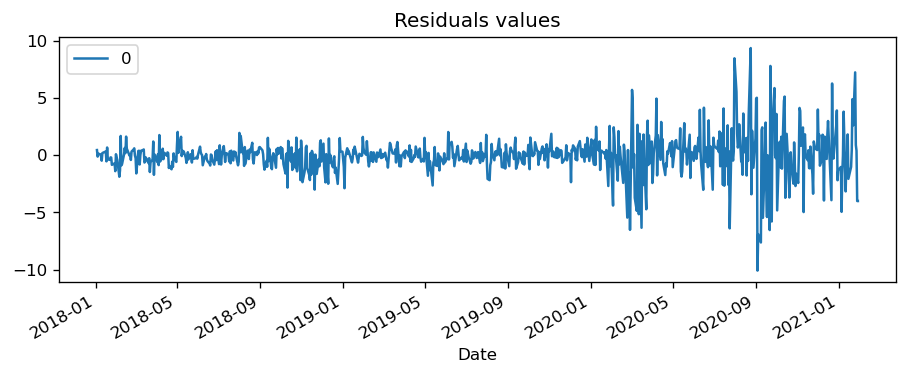

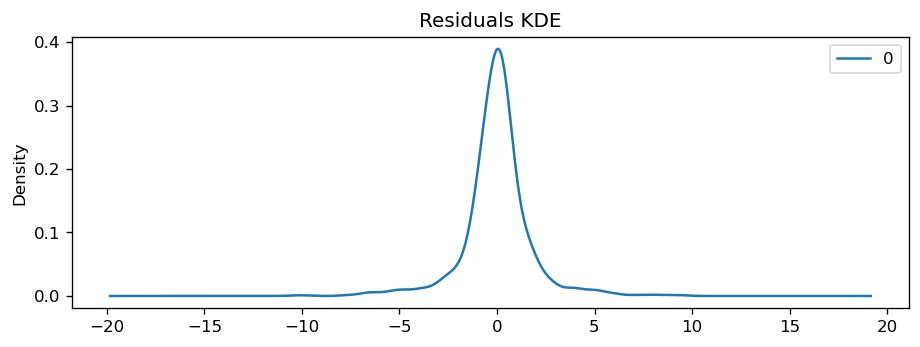

In [79]:
#df is my training set already. I fit the model with this one.

model = ARIMA(APPLE.Open, order=(2,1,0))
model_fit = model.fit()

print(model_fit.summary())


residuals = pd.DataFrame(model_fit.resid)

residuals.plot(title='Residuals values')
residuals.plot(kind='kde', title='Residuals KDE')


print(residuals.describe())

It's good, the residuals seems to distribuite well

To be sure about our choice, let's compare the performance of different ARIMA models, where the parameters p and q varies in [0,5] inteval

In [80]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(APPLE.Open, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3065.793, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3067.373, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3068.441, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3068.199, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3069.033, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3063.561, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3062.239, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3063.539, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3065.524, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3065.093, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 2.543 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  775
Model:               SARIMAX(2, 1, 0)   Log Likelihood        

Note that Prob(Q) >0.05; H>0.05. Ok.

##### FORECASTING

We will do rolling forecasting, but 1 step at the time and re-create the ARIMA model after each new observation is received.

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
X = APPLE.Open.values

size = int(len(X) * 0.70)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0] 
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)



predicted=70.359271, expected=64.315002
predicted=64.461358, expected=70.570000
predicted=69.682268, expected=75.917503
predicted=75.568876, expected=74.110001
predicted=74.022475, expected=73.879997
predicted=74.045680, expected=70.500000
predicted=70.749765, expected=65.937500
predicted=66.207164, expected=69.285004
predicted=69.410436, expected=69.347504
predicted=69.224145, expected=63.985001
predicted=64.302244, expected=66.222504
predicted=66.558463, expected=60.487499
predicted=60.953977, expected=61.877499
predicted=61.943164, expected=59.942501
predicted=60.151080, expected=61.847500
predicted=61.705488, expected=61.794998
predicted=61.824429, expected=57.020000
predicted=57.539809, expected=59.090000
predicted=58.995155, expected=62.687500
predicted=62.251933, expected=61.630001
predicted=61.606642, expected=63.187500
predicted=63.101684, expected=62.685001
predicted=62.718121, expected=63.900002
predicted=63.826877, expected=61.625000
predicted=61.881029, expected=60.084999


predicted=127.160819, expected=128.899994
predicted=128.605785, expected=128.960007
predicted=128.925910, expected=125.019997
predicted=125.369820, expected=131.610001
predicted=131.743022, expected=132.160004
predicted=131.503934, expected=131.320007
predicted=131.453785, expected=133.990005
predicted=134.045036, expected=138.050003
predicted=137.623692, expected=135.580002
predicted=135.411496, expected=134.080002
predicted=134.626046, expected=133.520004
predicted=133.880654, expected=128.889999
predicted=129.389861, expected=127.720001
predicted=128.460515, expected=128.360001
predicted=128.589254, expected=132.429993
predicted=132.248368, expected=129.190002
predicted=129.053931, expected=128.500000
predicted=129.066611, expected=128.759995
predicted=128.959210, expected=130.800003
predicted=130.773458, expected=128.779999
predicted=128.802677, expected=127.779999
predicted=128.222027, expected=128.660004
predicted=128.856786, expected=133.800003
predicted=133.501829, expected=136

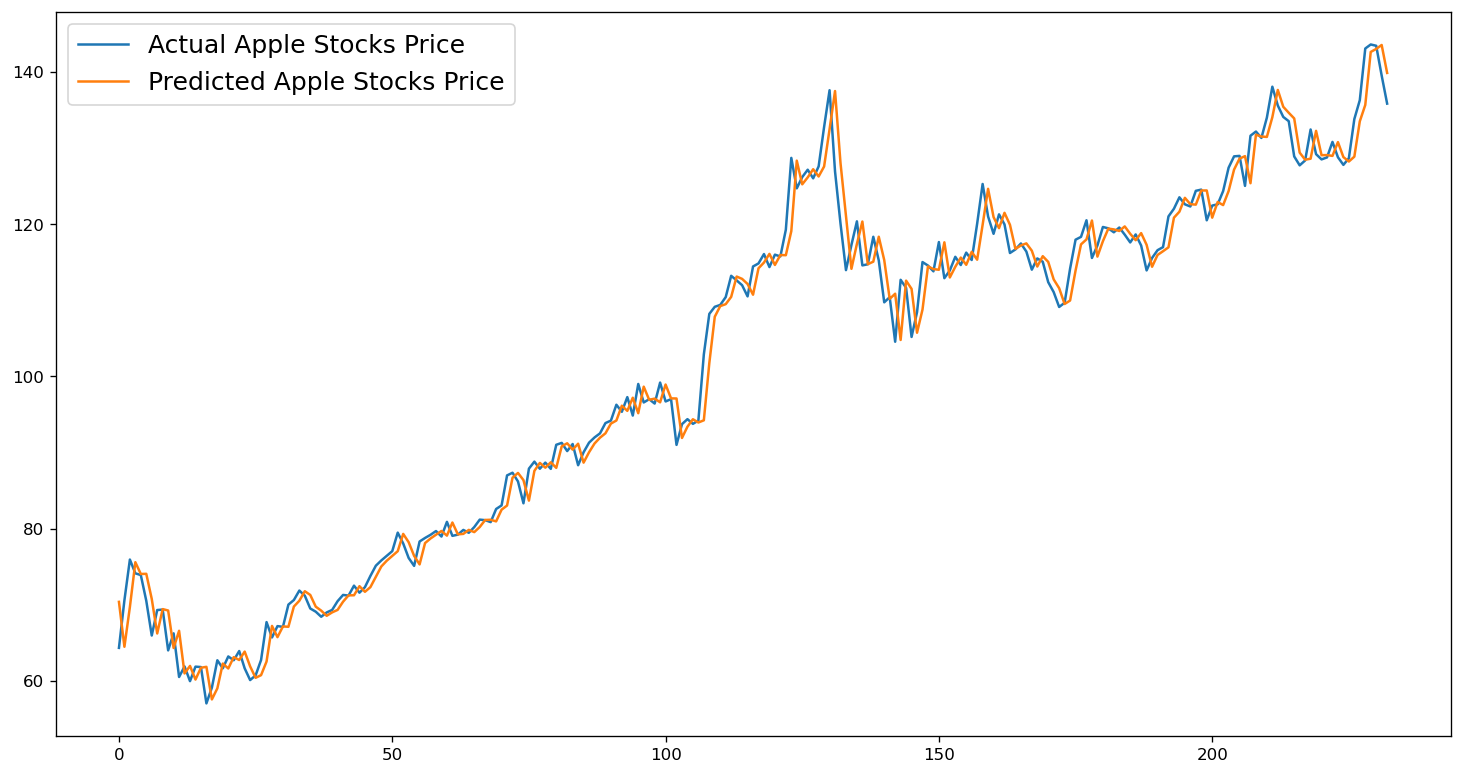

In [87]:
# plot forecasts against actual outcomes
plt.figure(figsize=[15,8])
plt.plot(test, label='Actual Apple Stocks Price')
plt.plot(predictions, label='Predicted Apple Stocks Price')
plt.legend(loc=2, fontsize=15)